# Module

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
from tqdm import tqdm_notebook as tqdm
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")
gc.enable()

In [2]:
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

# Load Data

In [3]:
train_raw = pd.read_csv('./data/train.csv')
test_raw = pd.read_csv('./data/test.csv')
train_raw.shape, test_raw.shape

((200000, 202), (200000, 201))

In [4]:
train = train_raw.copy()
test = test_raw.copy()

In [5]:
col_list = train.columns[2:]

In [6]:
train_0 = train[train.target == 0]
train_1 = train[train.target == 1]

In [7]:
pb_idx = np.load('./data_temp/public_LB.npy')
pv_idx = np.load('./data_temp/private_LB.npy')

In [8]:
test_pb = test.iloc[pb_idx].sort_index().copy()
test_pv = test.iloc[pv_idx].sort_index().copy()

test_real = test_pb.append(test_pv)

In [9]:
data = train.append(test_real)

# 겹치는 것

In [22]:
root = {}
for col in tqdm(col_list):

    root[col] = set(train[col].value_counts()[train[col].value_counts() != 1].index)

In [23]:
con_set = {}
    
for col in tqdm(col_list):
    target_0 = root[col].intersection(set(train_0[col].unique())).difference(set(train_1[col].unique()))
    target_1 = root[col].intersection(set(train_1[col].unique())).difference(set(train_0[col].unique()))
    
    target_0_and_1 = root[col].difference(target_0).difference(target_1)

    
    con_set[col] = {'target_0': target_0, 'target_1': target_1, 'target_0_and_1': target_0_and_1}

In [24]:
len(root['var_0'])

54317

In [27]:
len(con_set['var_0']['target_0']) + len(con_set['var_0']['target_1']) + len(con_set['var_0']['target_0_and_1'])

54317

showing var_0 ~ var_3


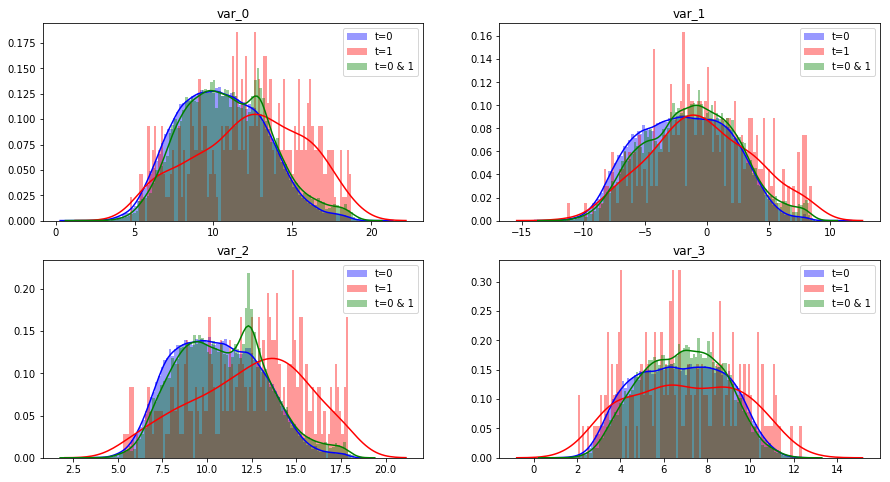

showing var_4 ~ var_7


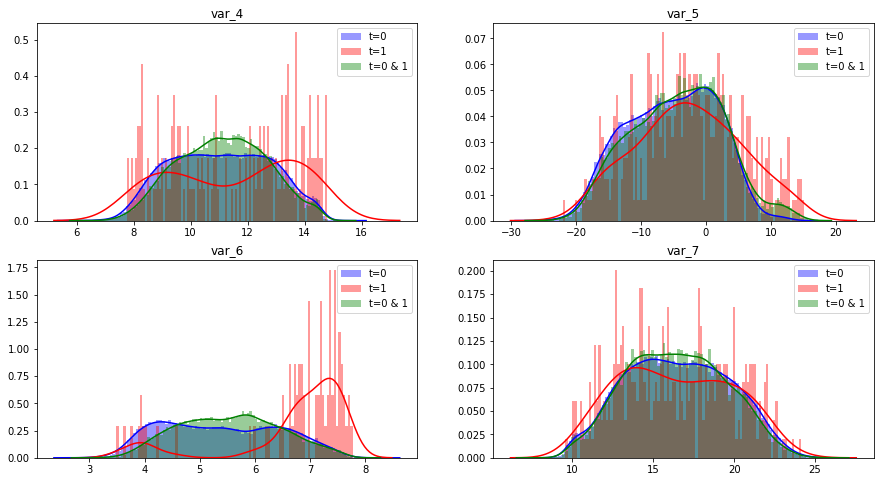

showing var_8 ~ var_11


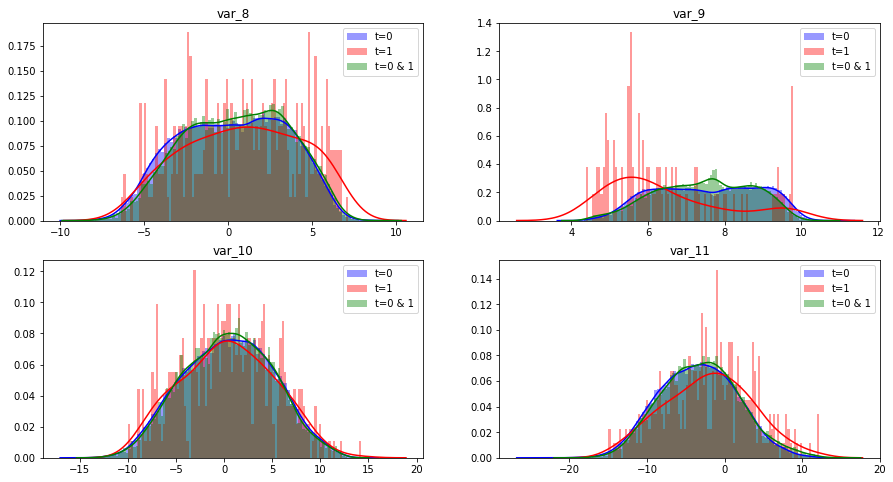

showing var_12 ~ var_15


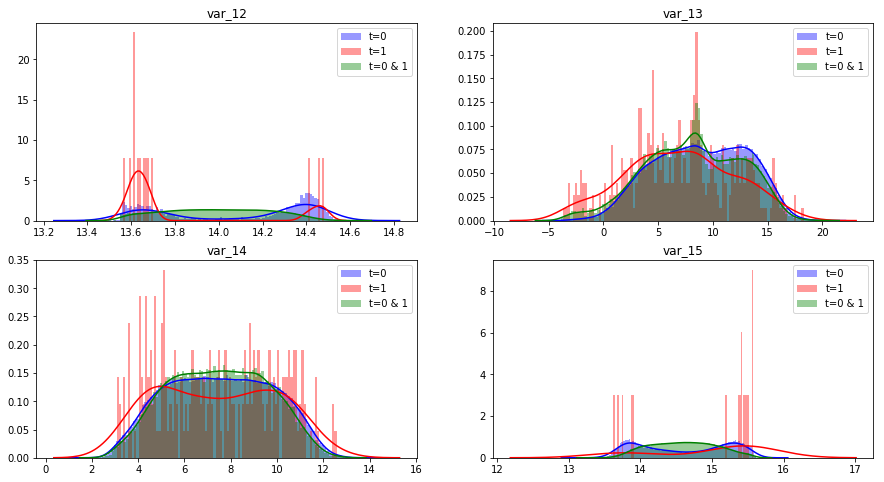

showing var_16 ~ var_19


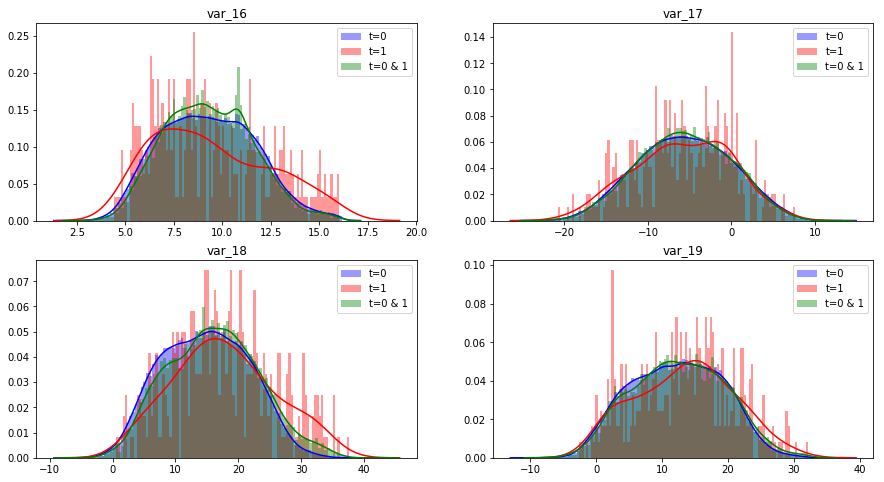

showing var_20 ~ var_23


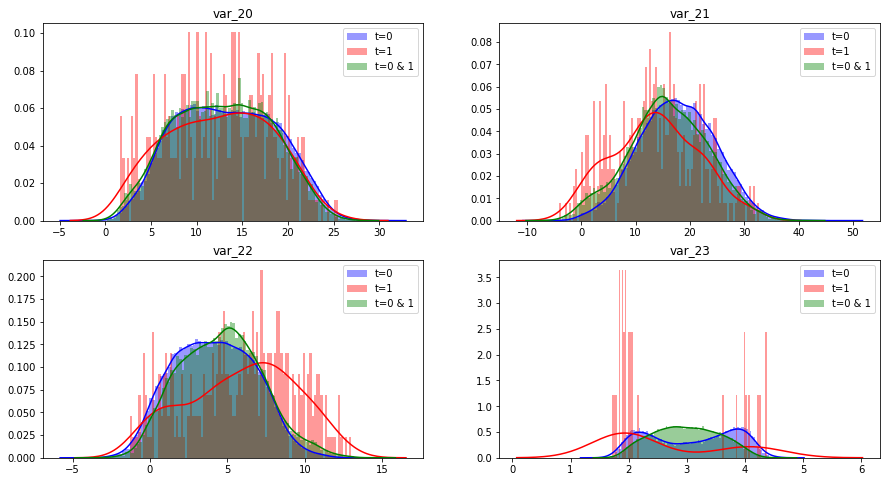

showing var_24 ~ var_27


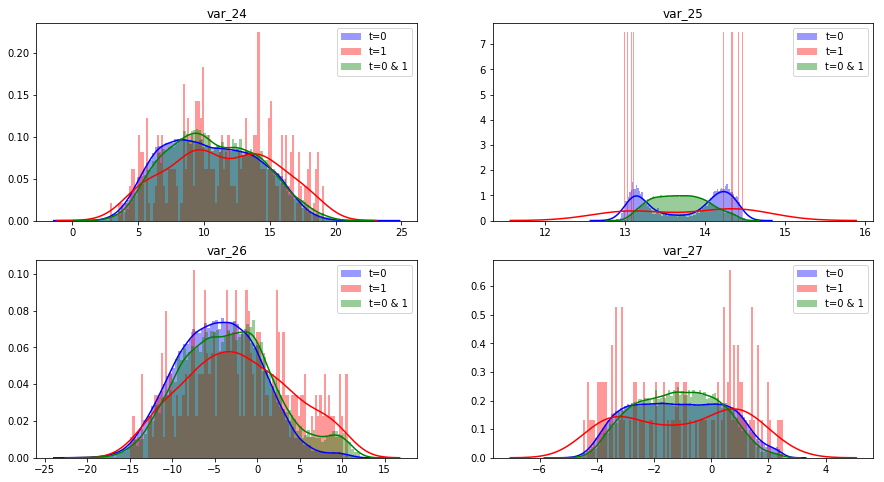

showing var_28 ~ var_31


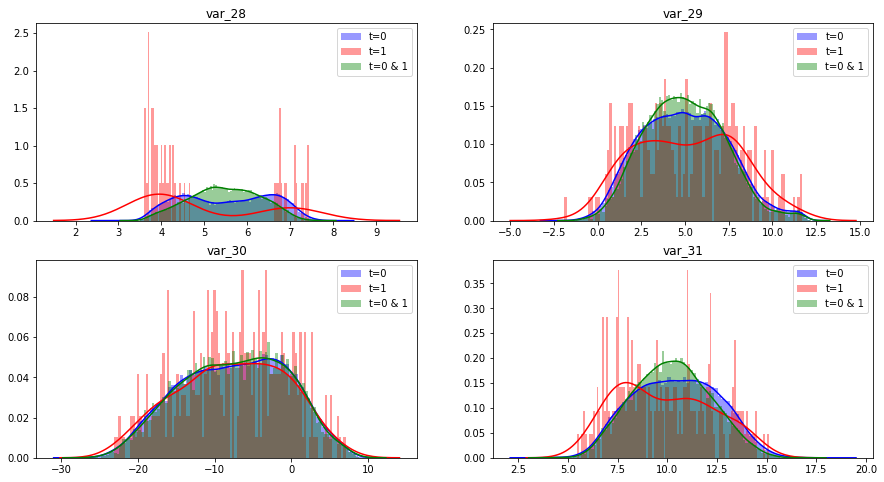

showing var_32 ~ var_35


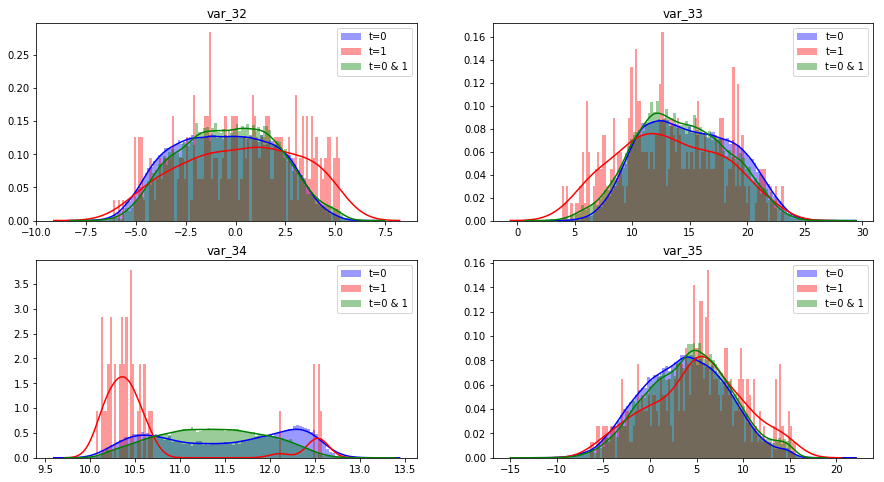

showing var_36 ~ var_39


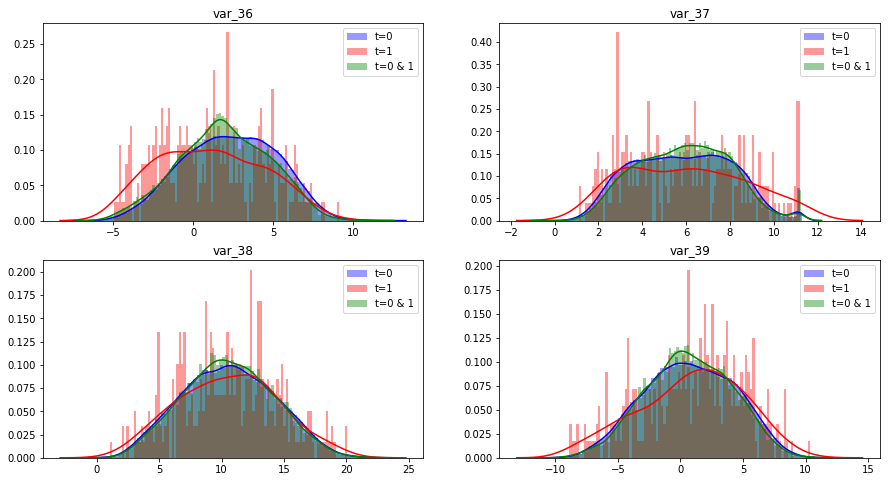

showing var_40 ~ var_43


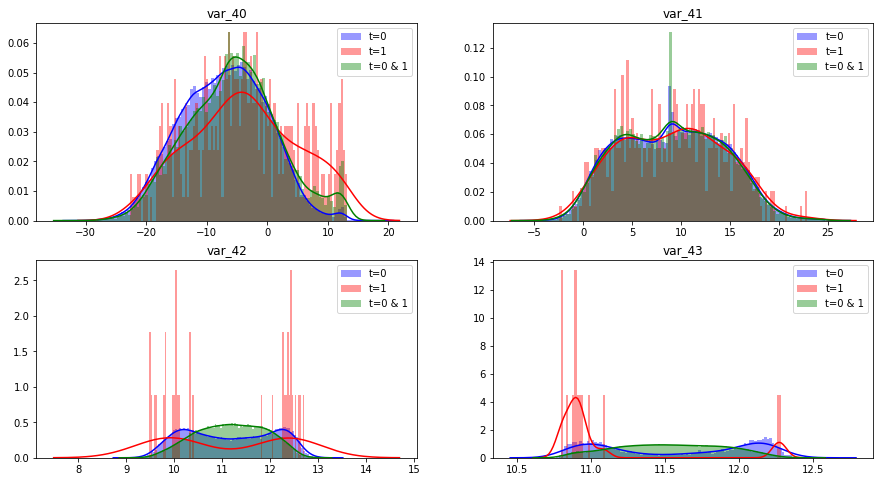

showing var_44 ~ var_47


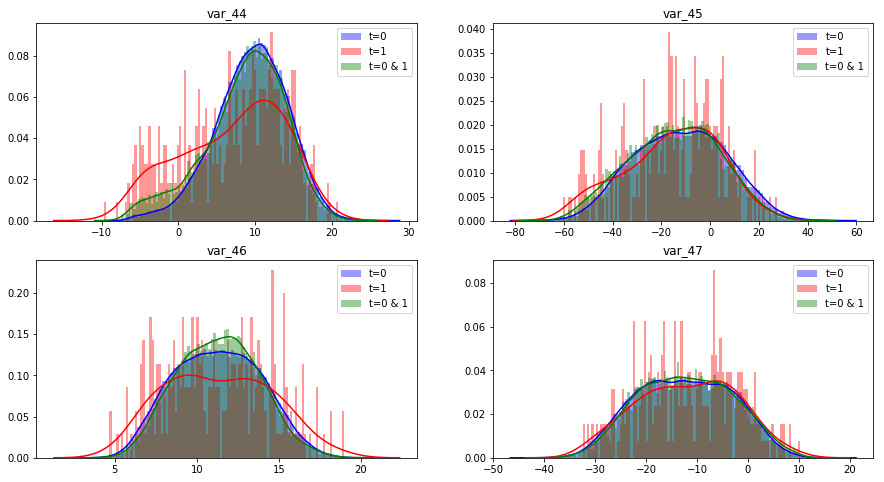

showing var_48 ~ var_51


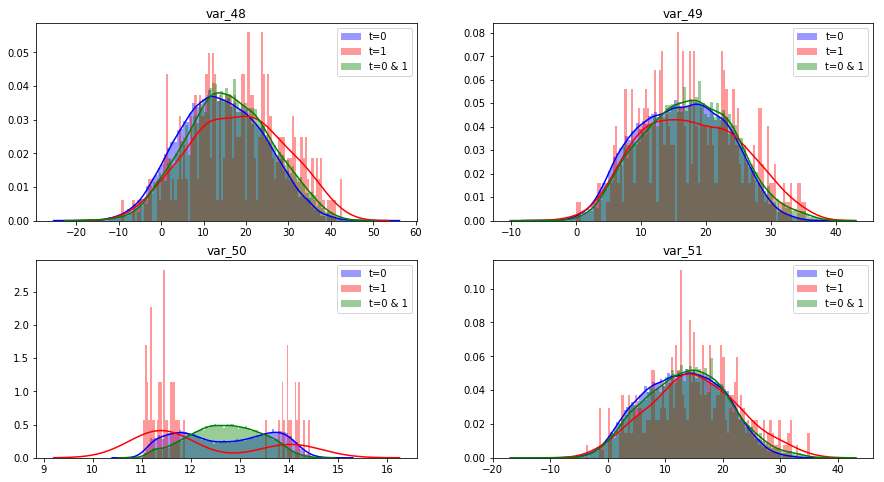

showing var_52 ~ var_55


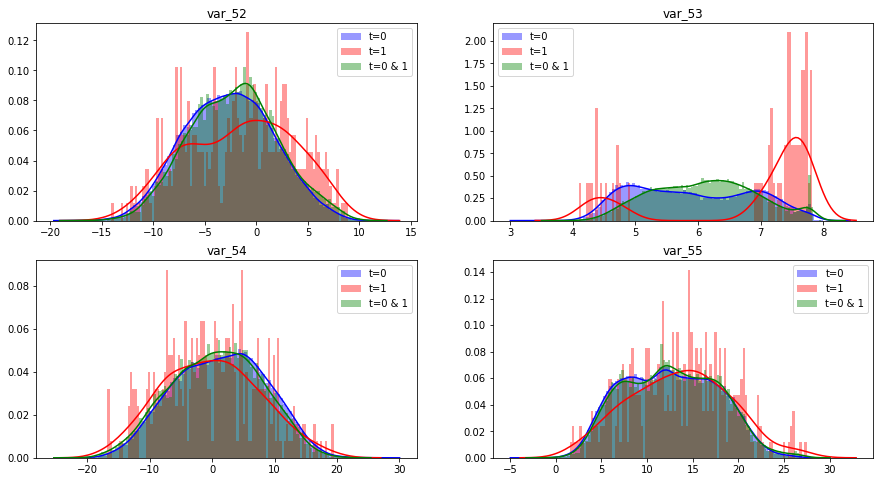

showing var_56 ~ var_59


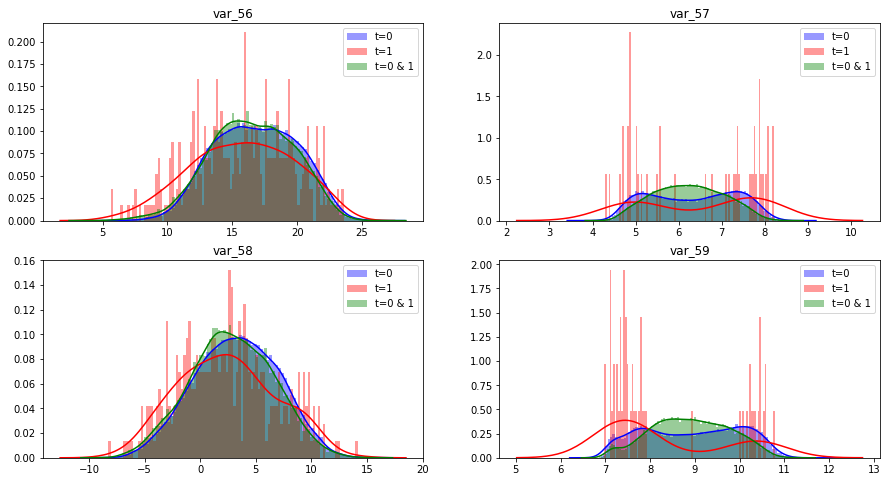

showing var_60 ~ var_63


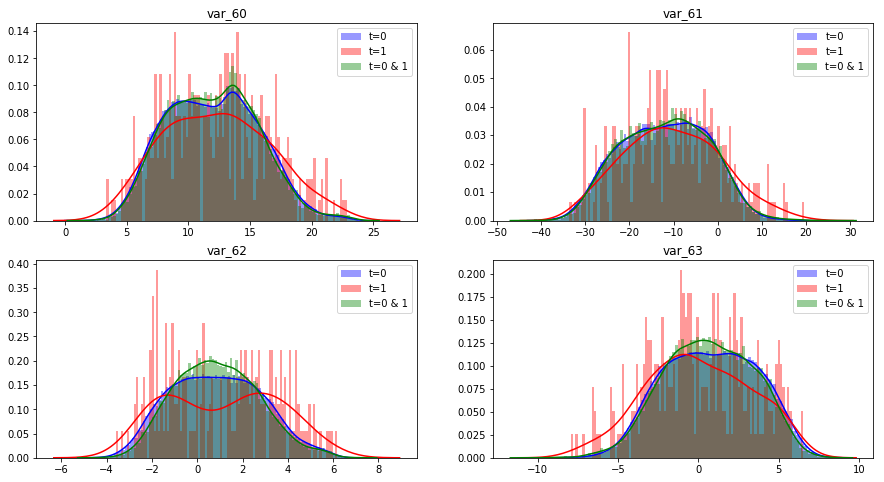

showing var_64 ~ var_67


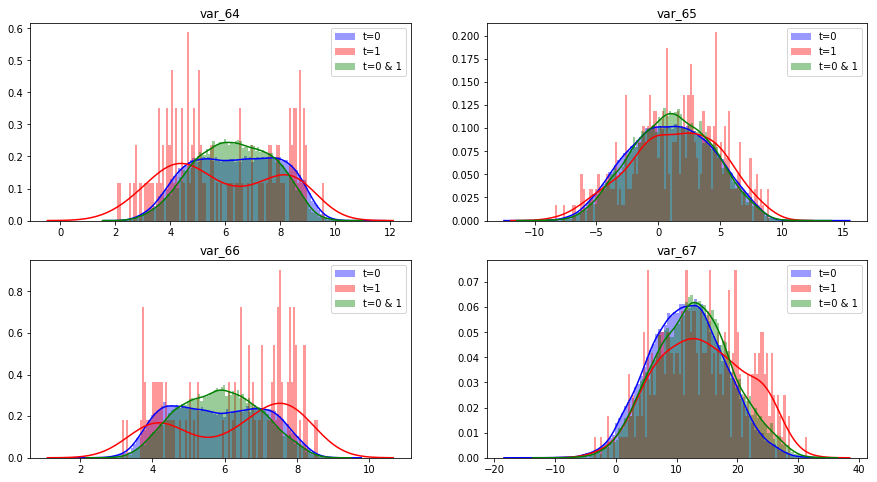

showing var_68 ~ var_71


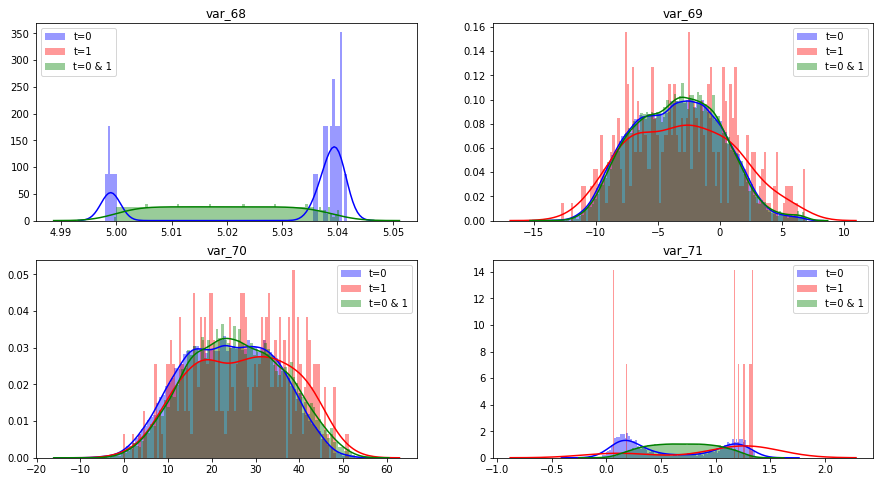

showing var_72 ~ var_75


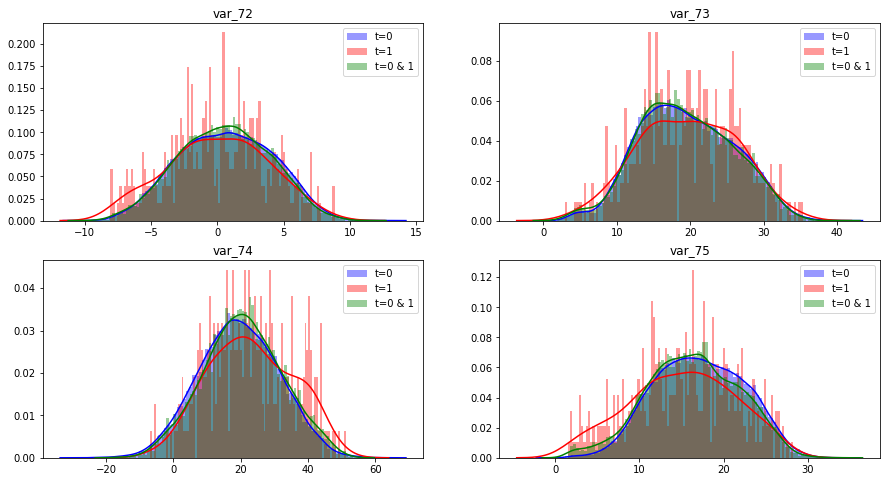

showing var_76 ~ var_79


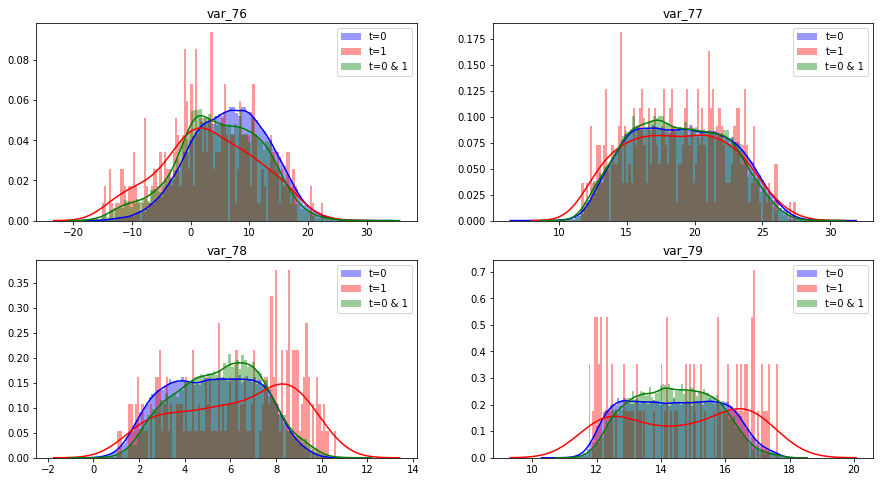

showing var_80 ~ var_83


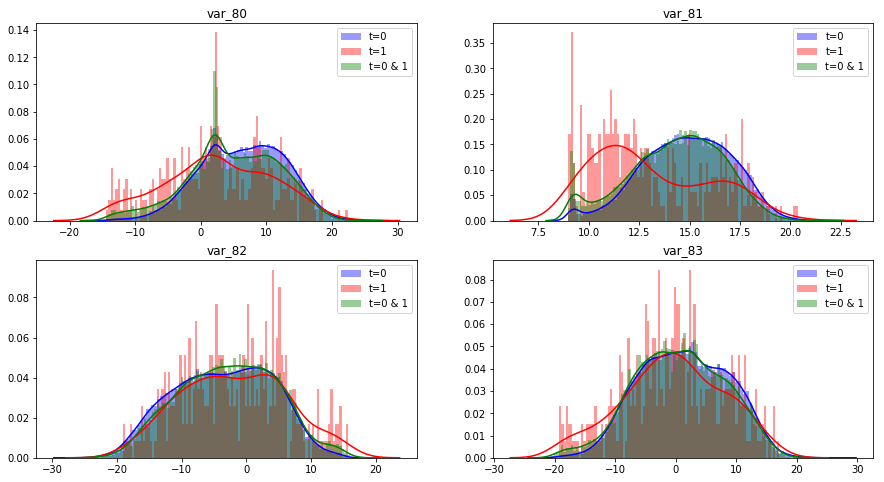

showing var_84 ~ var_87


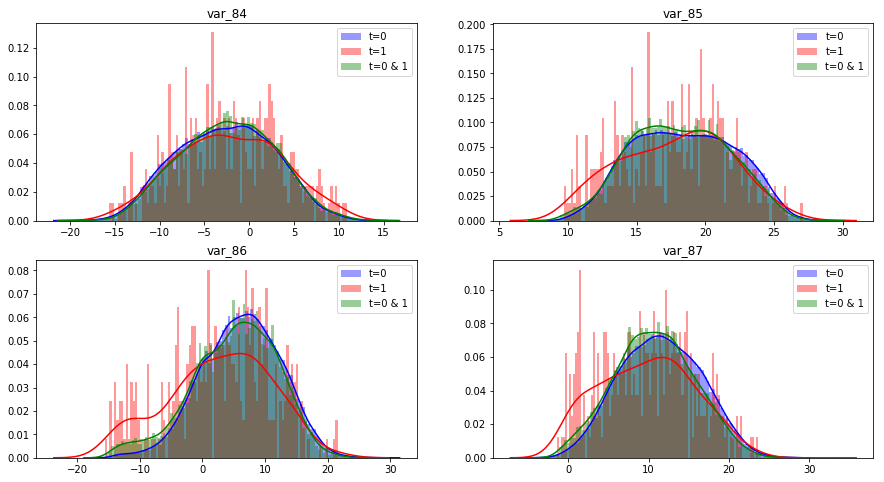

showing var_88 ~ var_91


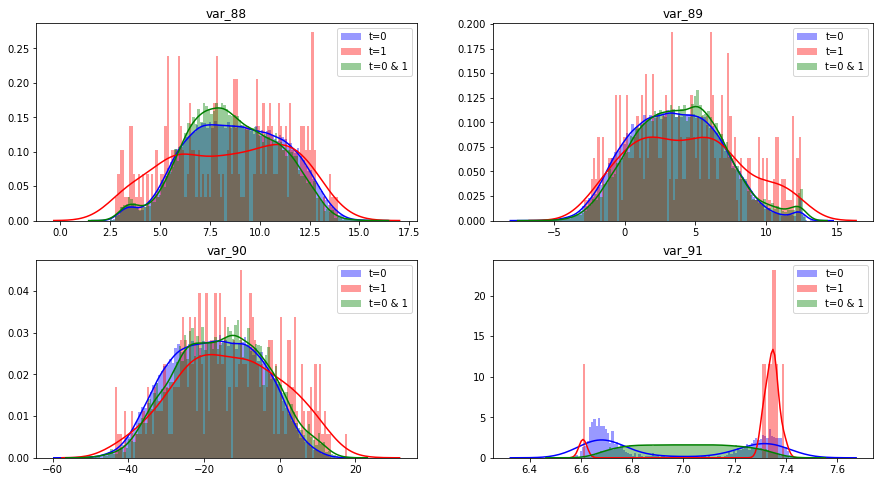

showing var_92 ~ var_95


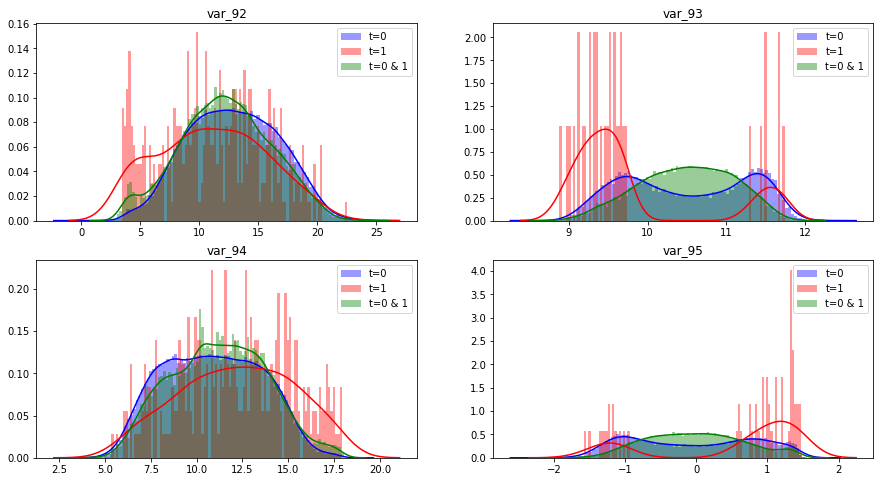

showing var_96 ~ var_99


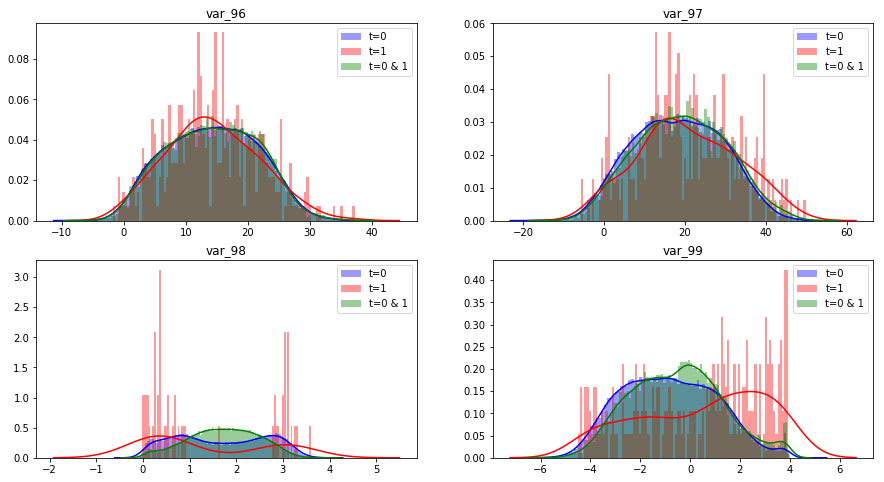

showing var_100 ~ var_103


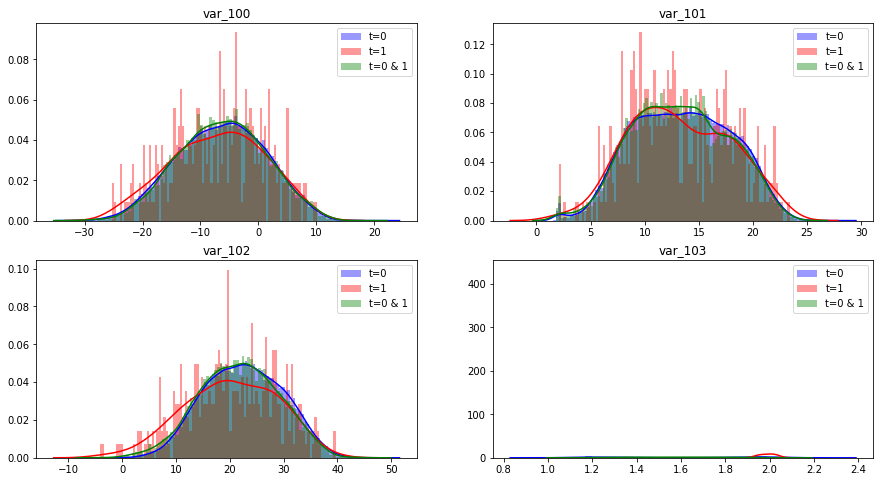

showing var_104 ~ var_107


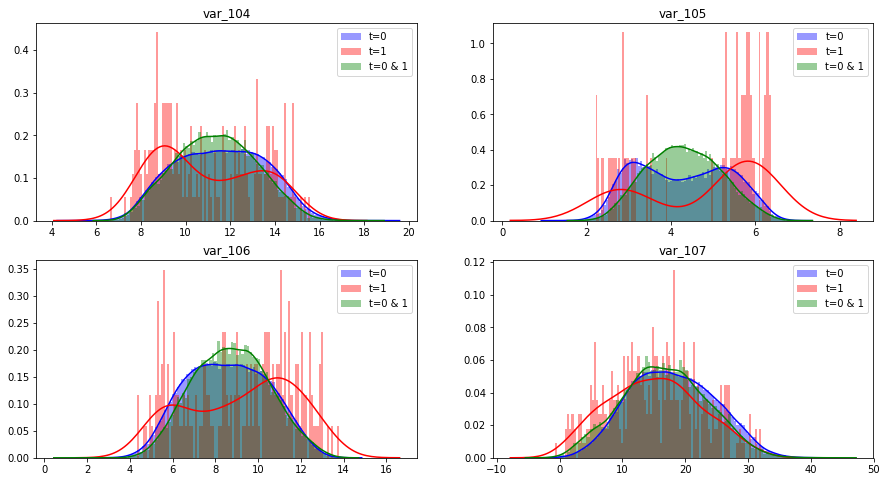

showing var_108 ~ var_111


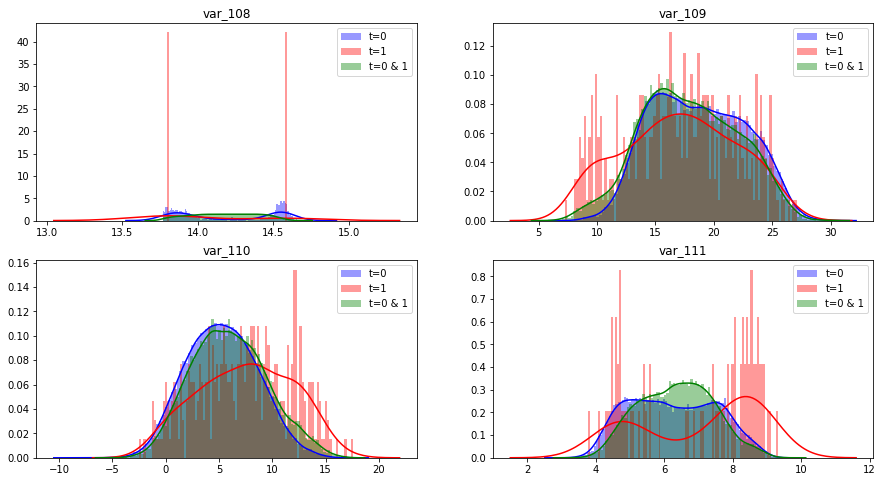

showing var_112 ~ var_115


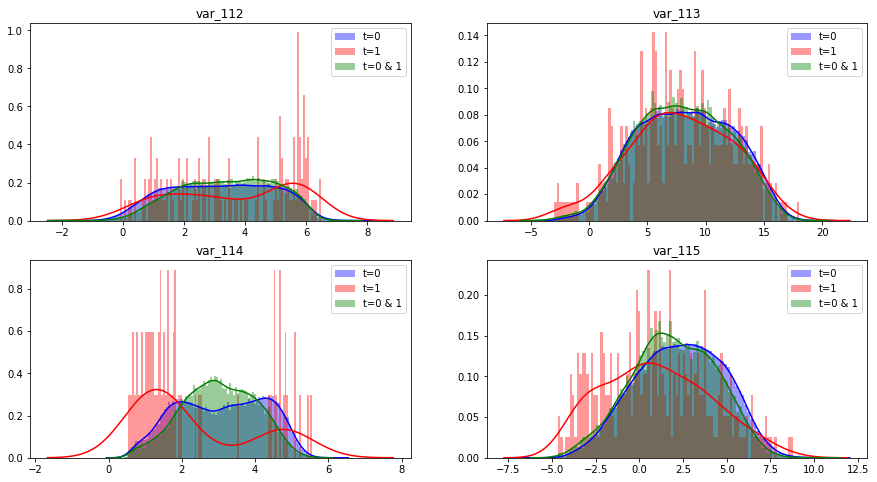

showing var_116 ~ var_119


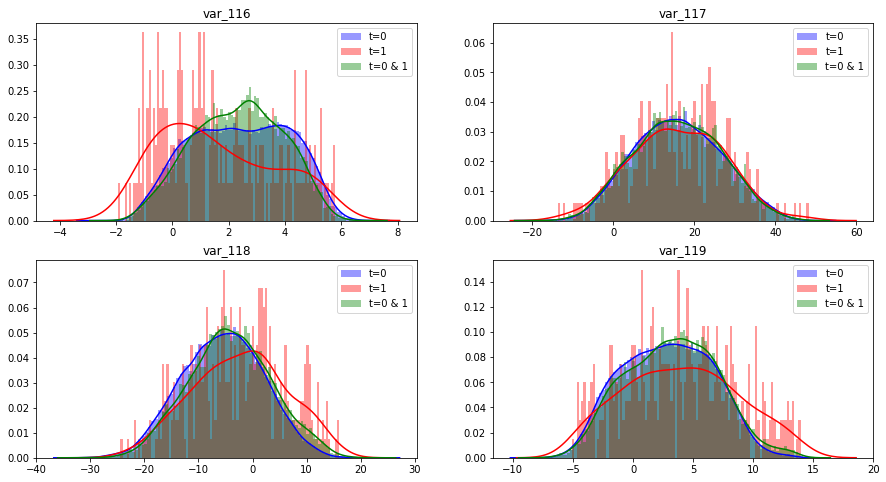

showing var_120 ~ var_123


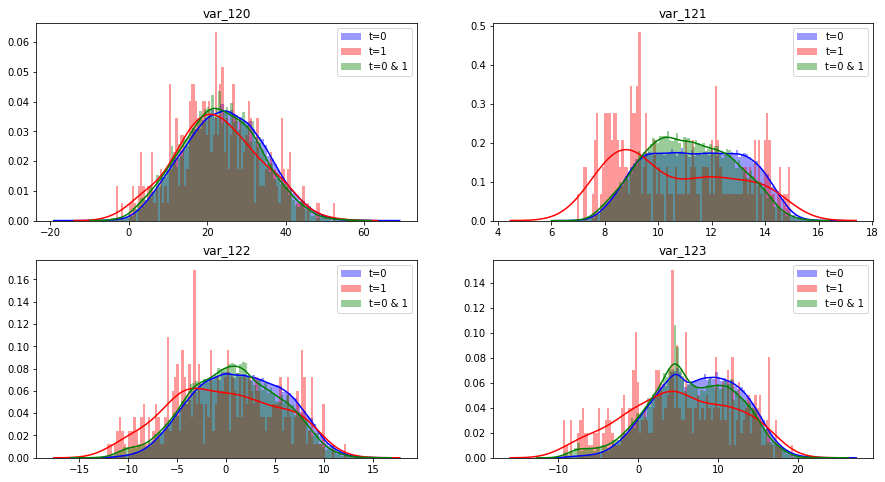

showing var_124 ~ var_127


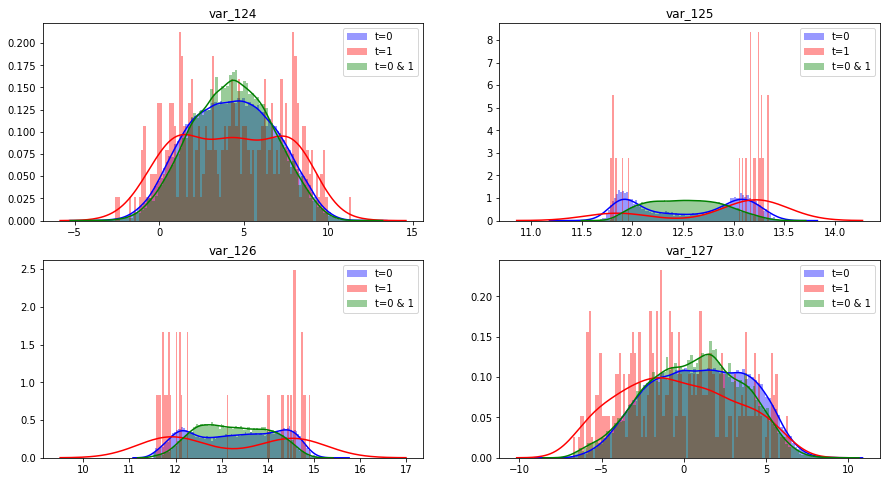

showing var_128 ~ var_131


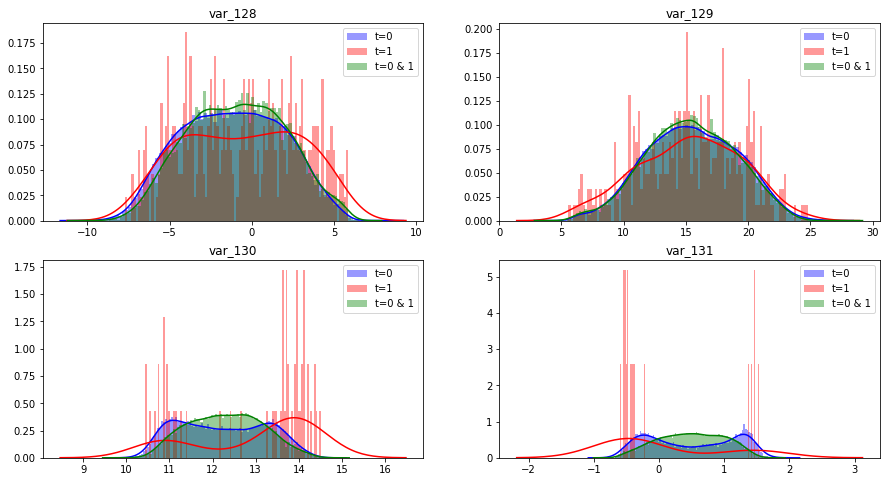

showing var_132 ~ var_135


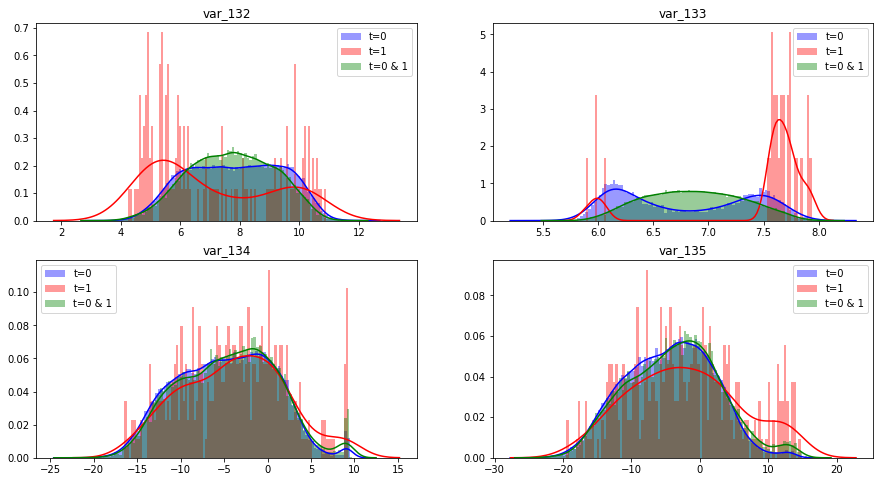

showing var_136 ~ var_139


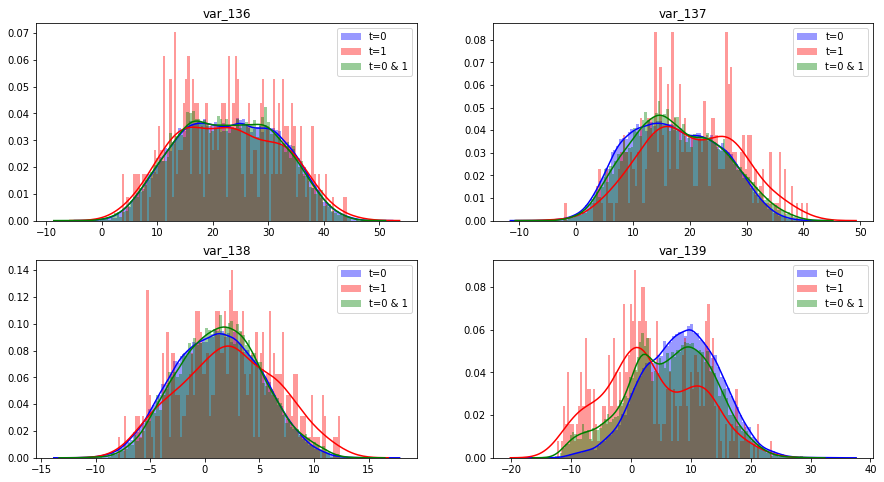

showing var_140 ~ var_143


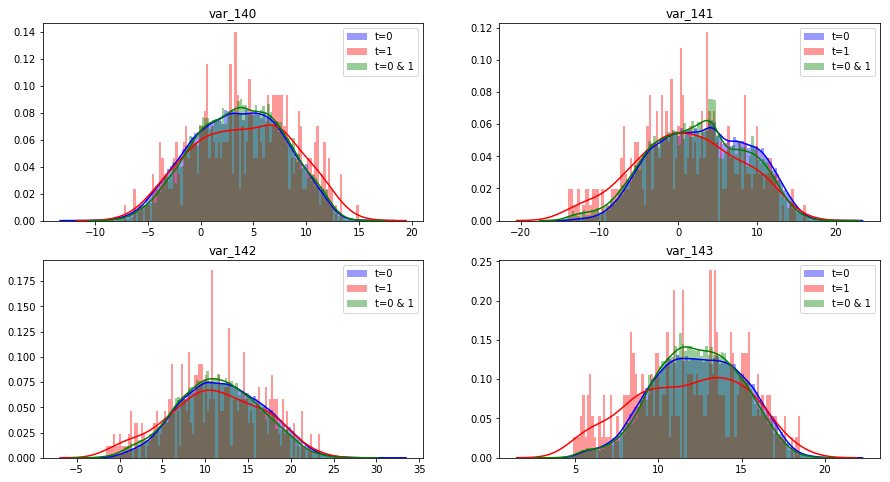

showing var_144 ~ var_147


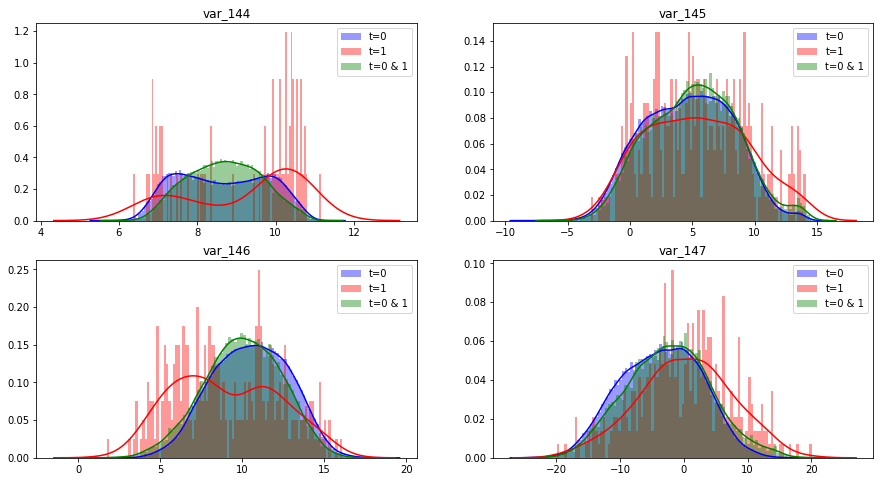

showing var_148 ~ var_151


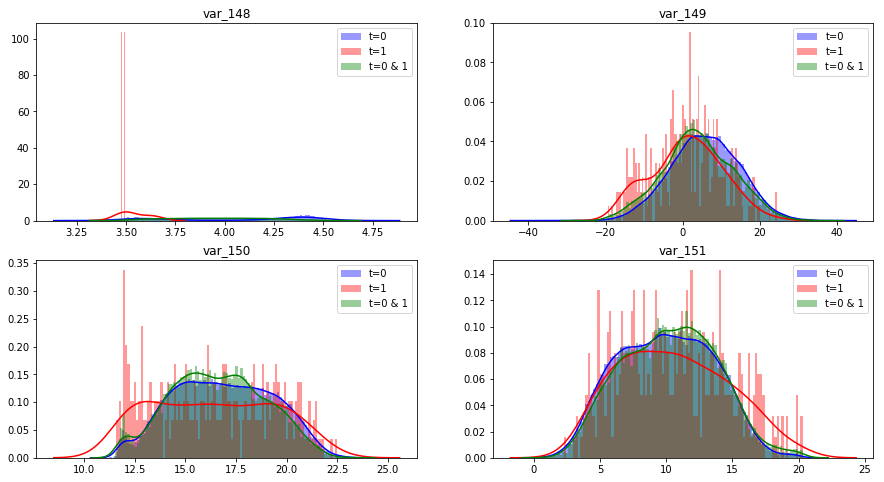

showing var_152 ~ var_155


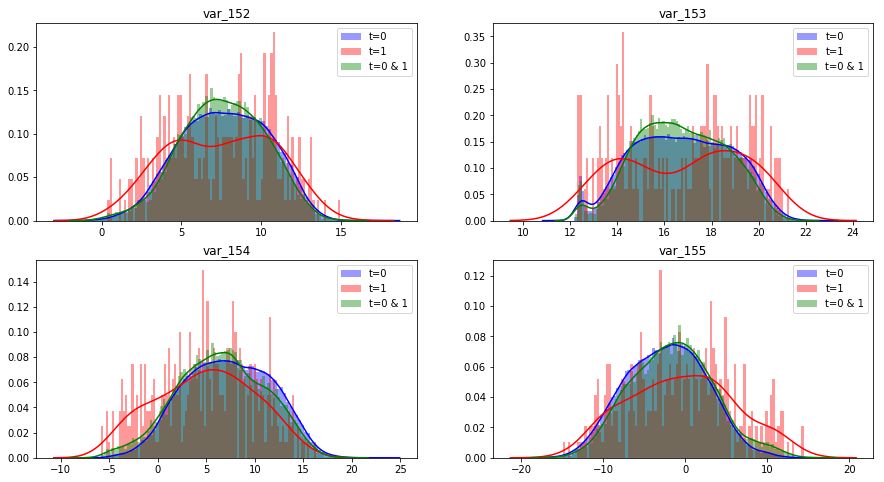

showing var_156 ~ var_159


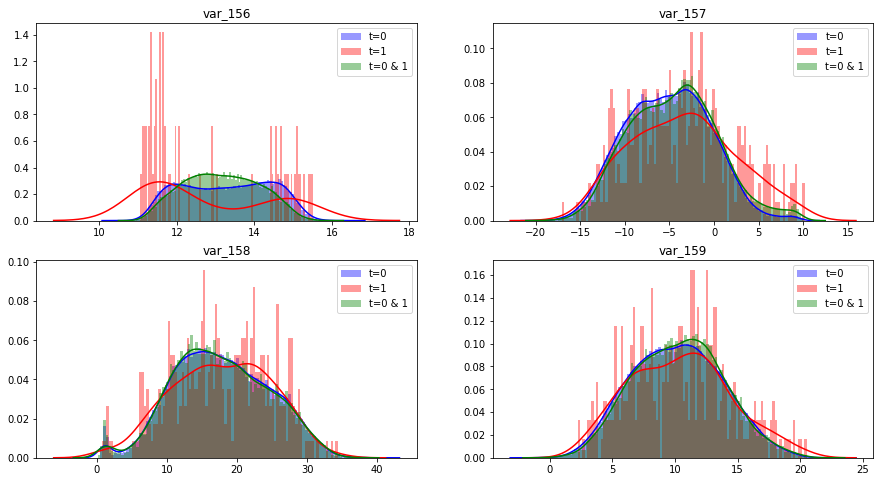

showing var_160 ~ var_163


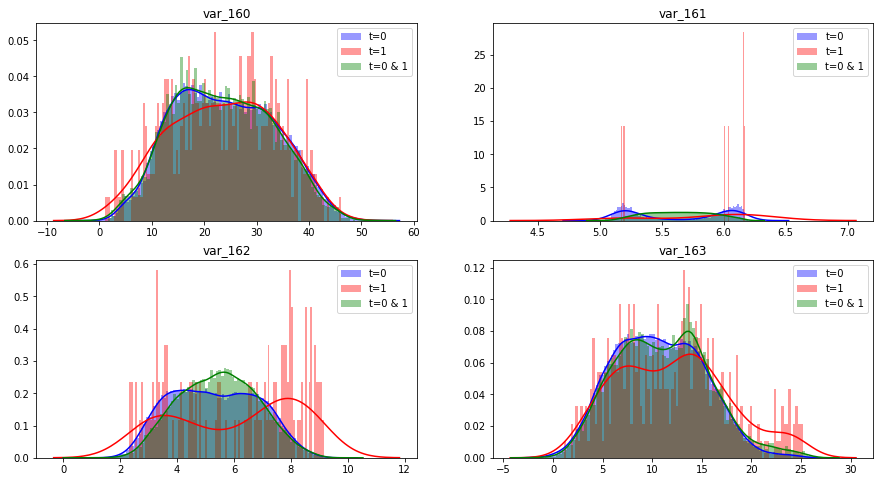

showing var_164 ~ var_167


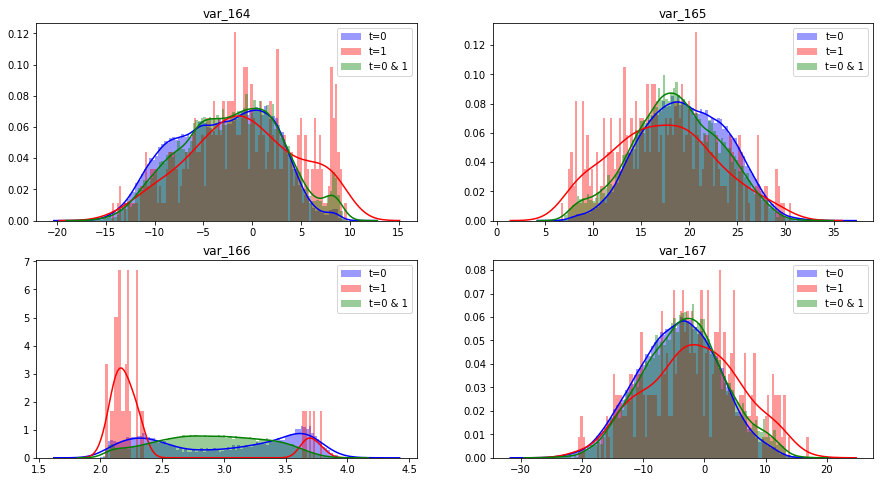

showing var_168 ~ var_171


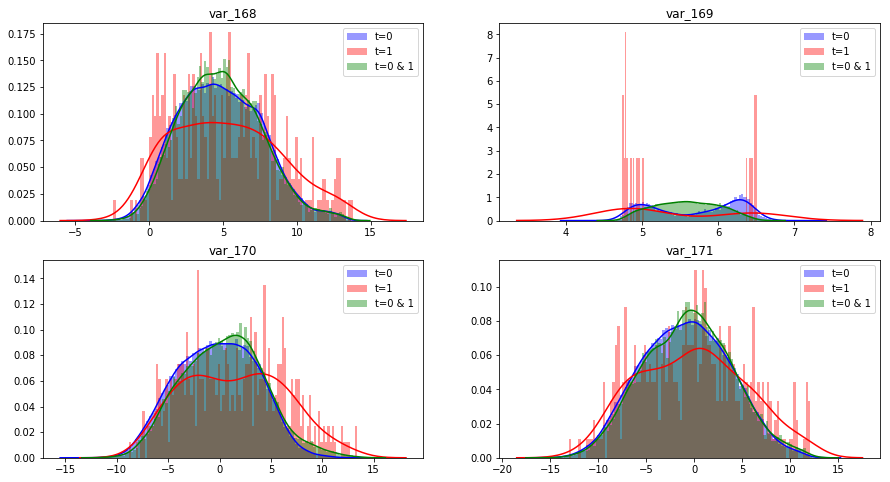

showing var_172 ~ var_175


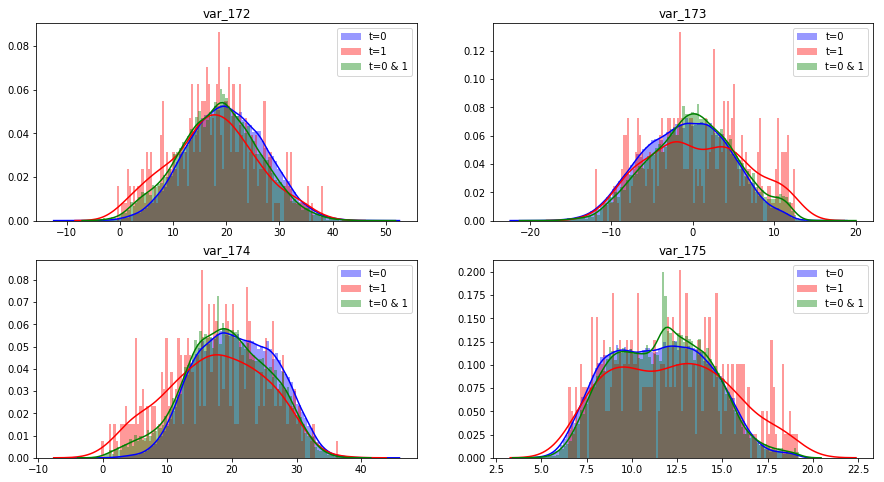

showing var_176 ~ var_179


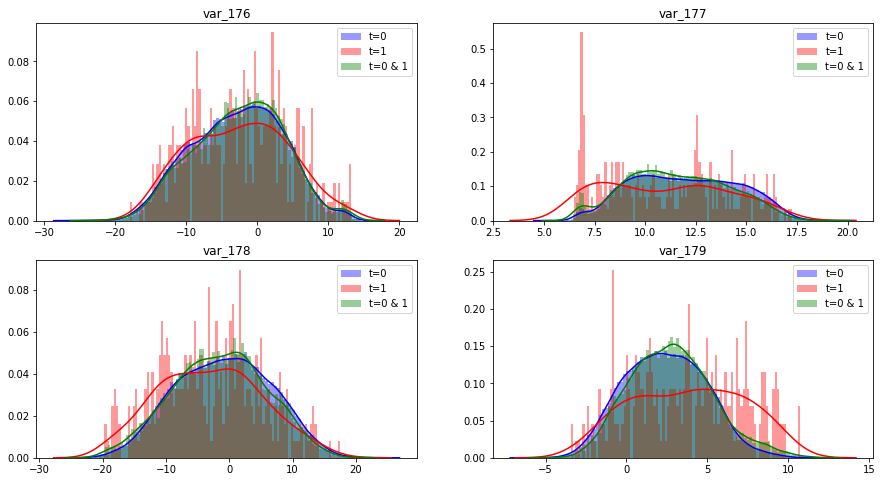

showing var_180 ~ var_183


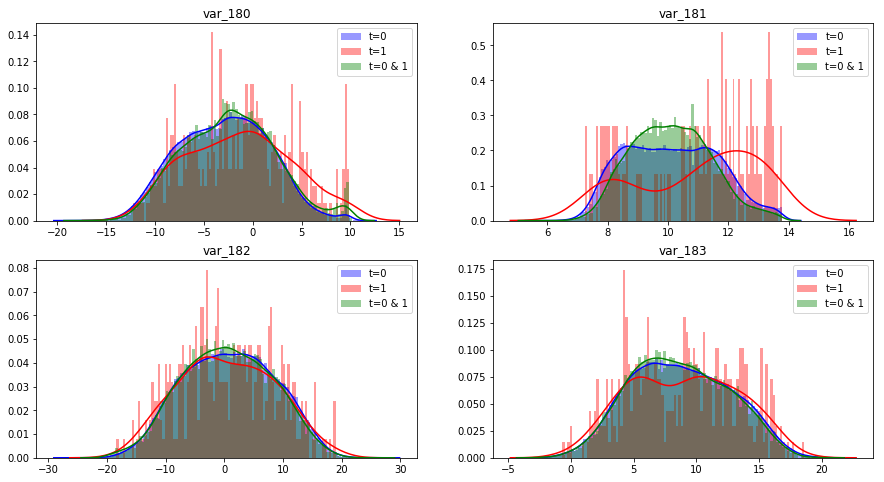

showing var_184 ~ var_187


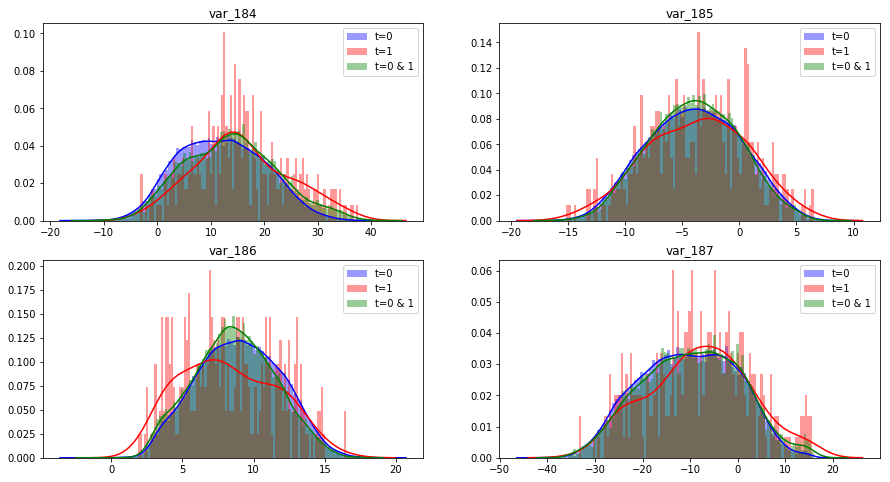

showing var_188 ~ var_191


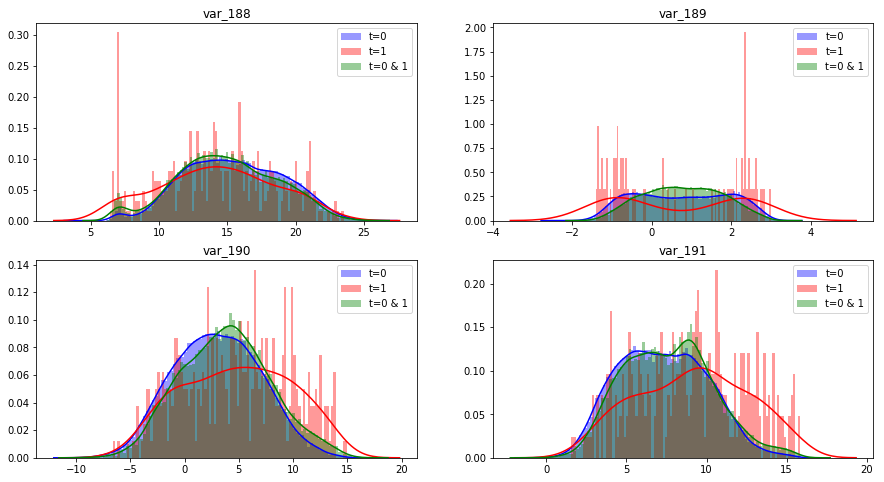

showing var_192 ~ var_195


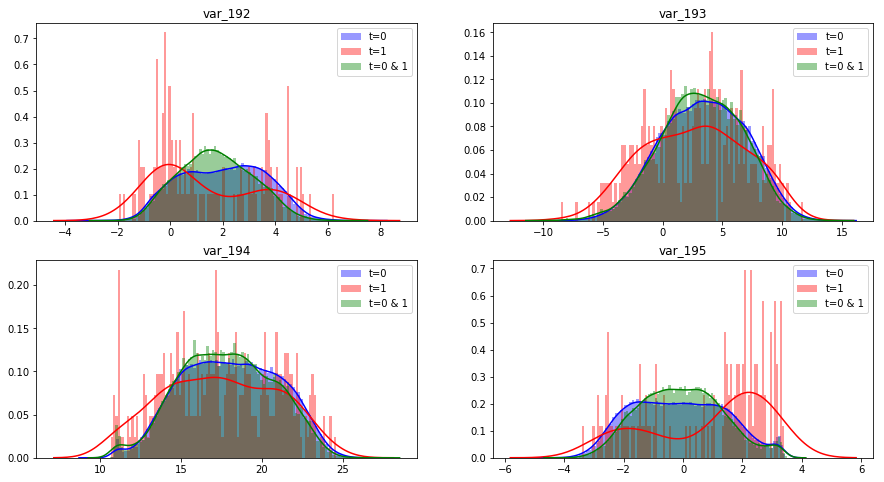

showing var_196 ~ var_199


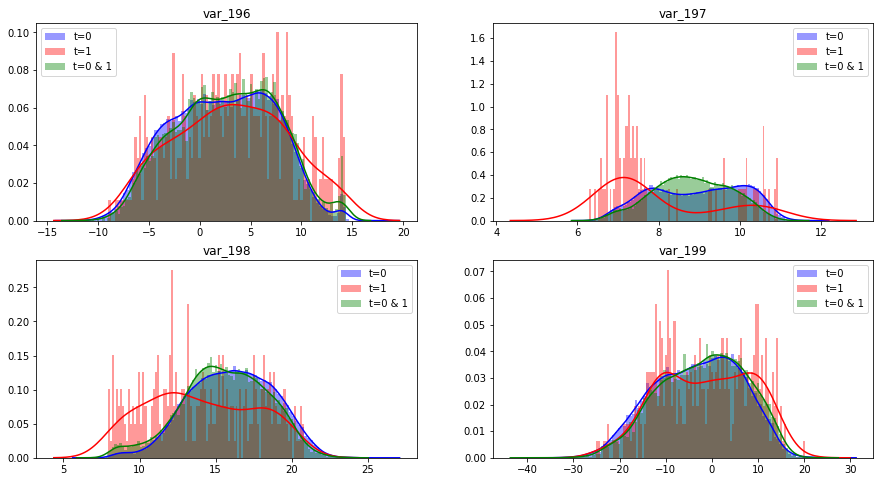

In [28]:
for i, _ in enumerate(col_list):
    i = i + 1
    if i % 4 != 0:
        continue
    
    print("showing var_{} ~ var_{}".format(i-4, i-1))
    plt.figure(figsize=(15, 8))

    for j, col in enumerate(col_list[i-4:i]):
        j = j + 1
        
        plt.subplot(2, 2, j)
        sns.distplot(list(con_set[col]['target_0']), label='t=0', color='b', bins=100)
        sns.distplot(list(con_set[col]['target_1']), label='t=1', color='r', bins=100)
        sns.distplot(list(con_set[col]['target_0_and_1']), label='t=0 & 1', color='g', bins=100)
        plt.legend()
        plt.title(col)
            
    plt.show()